**1. Extraer datos de los tweets**

In [3]:
import time
import pandas as pd
import re
from selenium import webdriver
from selenium.webdriver.edge.service import Service as EdgeService
from selenium.webdriver.edge.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Configura el controlador para Microsoft Edge
options = Options()
# options.add_argument('--headless')  # Descomenta esta línea si deseas ejecutar en modo sin cabeza
service = EdgeService(r'C:\Users\Usuario\Downloads\edgedriver_win64\msedgedriver.exe')  # Ajusta la ruta a msedgedriver_win64\msedgedriver.exe

# Inicia el navegador
driver = webdriver.Edge(service=service, options=options)

def login_to_x():
    """Inicia sesión en X"""
    driver.get('https://x.com/login')
    
    # Espera hasta que el campo de usuario esté presente
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//input[@name="text" and @type="text"]')))
    
    # Encuentra el campo de usuario por XPATH
    username_field = driver.find_element(By.XPATH, '//input[@name="text" and @type="text"]')
    username_field.clear()
    username = 'you_username'  # Reemplaza con tu nombre de usuario de X
    username_field.send_keys(username)
    time.sleep(2)
    
    # Encuentra el botón de siguiente y haz clic
    next_button = driver.find_element(By.XPATH, '//span[text()="Siguiente"]')  # Ajusta el XPATH si es necesario
    next_button.click()
    
    # Espera a que el campo de contraseña esté presente
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//input[@name="password" and @type="password"]')))
    
    # Encuentra el campo de contraseña por XPATH
    password_field = driver.find_element(By.XPATH, '//input[@name="password" and @type="password"]')
    password_field.clear()
    password = 'your_password'  # Reemplaza con tu contraseña
    password_field.send_keys(password)
    
    # Haz clic en el botón de iniciar sesión
    login_button = driver.find_element(By.XPATH, '//span[text()="Iniciar sesión"]')  # Ajusta el XPATH si es necesario
    login_button.click()
    
    # Espera unos segundos para verificar el inicio de sesión
    time.sleep(5)

def extract_comments(url, max_scrolls=3):
    """Extrae los comentarios de un tweet dado"""
    driver.get(url)
    
    # Espera hasta que el contenedor principal esté presente
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, 'body')))
    
    comments_set = set()  # Usar un conjunto para evitar comentarios duplicados
    all_text = []
    last_height = driver.execute_script("return document.body.scrollHeight")  # Inicializar last_height
    scrolls = 0

    while scrolls < max_scrolls:
        # Desplaza hacia abajo para cargar más comentarios
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(7)  # Espera un momento para que se carguen los comentarios
        
        # Extrae comentarios después de desplazar
        comment_elements = driver.find_elements(By.XPATH, '//div[@data-testid="tweetText"]//span')
        for element in comment_elements:
            comment_text = element.text
            if comment_text and comment_text not in comments_set:
                comments_set.add(comment_text)
                all_text.append(comment_text)

        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:  # Si no se carga más contenido, rompe el bucle
            break
        last_height = new_height
        scrolls += 1

    return all_text

def split_comments(text):
    """Separa el texto del tweet principal de los comentarios"""
    parts = re.split(r'\n\s*\n', '\n'.join(text))
    tweet_text = parts[0]
    comments = [part for part in parts[1:] if part.strip()]
    return tweet_text, comments

# Diccionario de URLs con fechas de publicación
tweet_urls = {
    'https://x.com/dumek_turbay/status/1810294804602896601': '2024-07-08',
    'https://x.com/dumek_turbay/status/1810326741518315926': '2024-07-08',
    'https://x.com/dumek_turbay/status/1810457618747449505': '2024-07-08',
    'https://x.com/dumek_turbay/status/1810683396521156736': '2024-07-09',
    'https://x.com/dumek_turbay/status/1810774488868605956': '2024-07-09',
    'https://x.com/dumek_turbay/status/1810840233451343925': '2024-07-09',
    'https://x.com/dumek_turbay/status/1811065638330200521': '2024-07-10',
    'https://x.com/dumek_turbay/status/1811110191058014270': '2024-07-10',
    'https://x.com/dumek_turbay/status/1811110956224651487': '2024-07-10',
    'https://x.com/dumek_turbay/status/1811550190790119677': '2024-07-11',
    'https://x.com/dumek_turbay/status/1811570705282036150': '2024-07-11',
    'https://x.com/dumek_turbay/status/1811760830305714449': '2024-07-12',
    'https://x.com/dumek_turbay/status/1811779138262303176': '2024-07-12',
    'https://x.com/dumek_turbay/status/1811889122023473381': '2024-07-12',
    'https://x.com/dumek_turbay/status/1812186968954180047': '2024-07-13',
    'https://x.com/dumek_turbay/status/1812272863937782081': '2024-07-13',
    'https://x.com/dumek_turbay/status/1812651169199665584': '2024-07-14',
    'https://x.com/dumek_turbay/status/1812467567744745721': '2024-07-14',
    'https://x.com/dumek_turbay/status/1812508352175624619': '2024-07-14',
    'https://x.com/dumek_turbay/status/1812831308155892145': '2024-07-15',
    'https://x.com/dumek_turbay/status/1812866188638044619': '2024-07-15',
    'https://x.com/dumek_turbay/status/1812872308698034284': '2024-07-15',
    'https://x.com/dumek_turbay/status/1812898373692785101': '2024-07-15',
    'https://x.com/dumek_turbay/status/1813431961685197095': '2024-07-16',
    'https://x.com/dumek_turbay/status/1813231644456665589': '2024-07-16',
    'https://x.com/dumek_turbay/status/1813198073415311448': '2024-07-16',
    'https://x.com/dumek_turbay/status/1813587996974940614': '2024-07-17',
    'https://x.com/dumek_turbay/status/1813588885190156306': '2024-07-17',
    'https://x.com/dumek_turbay/status/1813658549777764553': '2024-07-17',
    'https://x.com/dumek_turbay/status/1813729204661612670': '2024-07-17',
    'https://x.com/dumek_turbay/status/1813732885217862080': '2024-07-17',
    'https://x.com/dumek_turbay/status/1813907616600310153': '2024-07-18',
    'https://x.com/dumek_turbay/status/1813954949648208068': '2024-07-18',
    'https://x.com/dumek_turbay/status/1814057186357891290': '2024-07-18',
    'https://x.com/dumek_turbay/status/1814324157351420362': '2024-07-19',
    'https://x.com/dumek_turbay/status/1814332426178424863': '2024-07-19',
    'https://x.com/dumek_turbay/status/1814337751870845364': '2024-07-19',
    'https://x.com/dumek_turbay/status/1814431657887445067': '2024-07-19',
    'https://x.com/dumek_turbay/status/1814717384638304271': '2024-07-20',
    'https://x.com/dumek_turbay/status/1814750646186242227': '2024-07-20',
    'https://x.com/dumek_turbay/status/1815017002123079726': '2024-07-21',
    'https://x.com/dumek_turbay/status/1815059716390682778': '2024-07-21',
    'https://x.com/dumek_turbay/status/1815064534010261963': '2024-07-21',
    'https://x.com/dumek_turbay/status/1815103545924112612': '2024-07-21',
    'https://x.com/dumek_turbay/status/1815355396170690747': '2024-07-22',
    'https://x.com/dumek_turbay/status/1815743840428405063': '2024-07-23',
    'https://x.com/dumek_turbay/status/1815755918904324104': '2024-07-23',
    'https://x.com/dumek_turbay/status/1815877187792429496': '2024-07-23',
    'https://x.com/dumek_turbay/status/1815878502823923876': '2024-07-23',
    'https://x.com/dumek_turbay/status/1815883010773758151': '2024-07-23',
    'https://x.com/dumek_turbay/status/1816153177894645931': '2024-07-24',
    'https://x.com/dumek_turbay/status/1816155552139076061': '2024-07-24',
    'https://x.com/dumek_turbay/status/1816212915554488646': '2024-07-24',
    'https://x.com/dumek_turbay/status/1816336055303299122': '2024-07-24',
    'https://x.com/dumek_turbay/status/1816498777722700073': '2024-07-25',
    'https://x.com/dumek_turbay/status/1816670213082939858': '2024-07-25',
    'https://x.com/dumek_turbay/status/1816901513630888404': '2024-07-26',
    'https://x.com/dumek_turbay/status/1816894816166302179': '2024-07-26',
    'https://x.com/dumek_turbay/status/1816862407999779122': '2024-07-26',
    'https://x.com/dumek_turbay/status/1816859264540954696': '2024-07-26',
    'https://x.com/dumek_turbay/status/1816856544002085065': '2024-07-26',
    'https://x.com/dumek_turbay/status/1816855553143980067': '2024-07-26',
    'https://x.com/dumek_turbay/status/1816691699718000713': '2024-07-26',

}

# Crear un DataFrame para almacenar los resultados
df_all_comments = pd.DataFrame(columns=['Tweet ID', 'Fecha de Publicación', 'Tweet Texto', 'Comentario'])

# Iniciar sesión
login_to_x()

for tweet_url, fecha_publicacion in tweet_urls.items():
    all_text = extract_comments(tweet_url)
    tweet_text, comments = split_comments(all_text)
    
    # Información del tweet
    tweet_data = {
        'tweet_id': tweet_url.split('/')[-1],
        'fecha_publicacion': fecha_publicacion,
        'tweet_text': tweet_text,
        'comments': comments
    }

    # Almacenar los comentarios en un DataFrame
    df_comments = pd.DataFrame(tweet_data['comments'], columns=['Comentario'])
    df_comments['Tweet ID'] = tweet_data['tweet_id']
    df_comments['Fecha de Publicación'] = tweet_data['fecha_publicacion']
    df_comments['Tweet Texto'] = tweet_data['tweet_text']

    # Añadir los datos al DataFrame general
    df_all_comments = pd.concat([df_all_comments, df_comments], ignore_index=True)

# Cerrar el navegador
driver.quit()

# Procesar los comentarios para segmentarlos
def segmentar_texto(text_list):
    segmented_comments = []
    current_comment = ""
    
    for text in text_list:
        # Divide el texto en líneas basadas en saltos de línea
        comentarios = text.split('\n')
        comentarios = [comentario.strip() for comentario in comentarios if comentario.strip()]
        
        for comentario in comentarios:
            # Si el comentario empieza con una letra minúscula o con signos de puntuación, lo une al comentario actual
            if comentario and (comentario[0].islower() or comentario[0] in ',.!?'):
                if current_comment:
                    current_comment += " " + comentario
            else:
                # Si hay un comentario acumulado, lo añade a la lista
                if current_comment:
                    segmented_comments.append(current_comment)
                # Comienza un nuevo comentario si el comentario empieza con una letra mayúscula
                if comentario and comentario[0].isupper():
                    current_comment = comentario
                else:
                    current_comment = ""
    
    # Agrega el último comentario si existe
    if current_comment:
        segmented_comments.append(current_comment)
    
    return segmented_comments

# Aplicar la función de segmentación de texto a cada comentario
df_all_comments['Comentario'] = df_all_comments['Comentario'].apply(lambda x: x.split('\n') if isinstance(x, str) else x)
df_all_comments['Comentario'] = df_all_comments['Comentario'].apply(segmentar_texto)

# Desplegar listas en filas individuales
df_all_comments = df_all_comments.explode('Comentario')
df_all_comments = df_all_comments[df_all_comments['Comentario'] != 'Dumek Turbay']
df_all_comments = df_all_comments.reset_index(drop=True)

# Guardar el DataFrame en un archivo CSV
df_all_comments.to_csv('F:\ManuelAngulo\PROYECTOS\ANALISIS DE SENTIMIENTOS\data\X_dumek_data.csv', index=False, header=True)

Las 20 palabras más comunes:
que: 830
a: 536
no: 373
alcalde: 293
lo: 189
cartagena: 158
más: 124
ciudad: 118
su: 113
si: 111
le: 98
pero: 92
dumek: 90
gracias: 87
está: 81
todo: 79
como: 73
hay: 71
muy: 70
excelente: 68


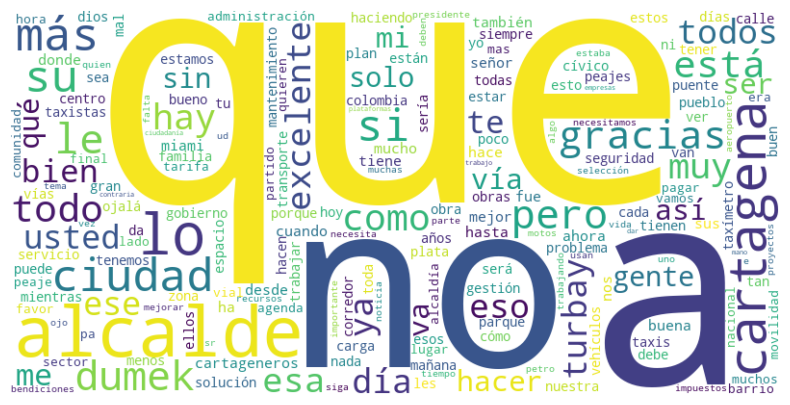

In [2]:
import pandas as pd
from collections import Counter
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Crear una copia del DataFrame para trabajar con los comentarios

df = pd.read_csv(r'F:\ManuelAngulo\PROYECTOS\ANALISIS DE SENTIMIENTOS\data\X_dumek_data_filtrado.csv')

# Función para tokenizar el texto y contar las palabras
def contar_palabras(texto):
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)  # Eliminar signos de puntuación
    palabras = texto.split()  # Dividir en palabras
    return palabras

# Concatenar todos los comentarios en una sola cadena
todos_los_comentarios = ' '.join(df['Comentario Limpio'])

# Contar las palabras en todos los comentarios
palabras = contar_palabras(todos_los_comentarios)

# Contar la frecuencia de cada palabra
frecuencia_palabras = Counter(palabras)

# Obtener las 20 palabras más comunes
palabras_comunes = frecuencia_palabras.most_common(20)
print("Las 20 palabras más comunes:")
for palabra, frecuencia in palabras_comunes:
    print(f"{palabra}: {frecuencia}")

# Crear una nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frecuencia_palabras)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()